# Initial EDA from Bernardo

At this stage, we need to find ways to process this amount of data, as well as deriving key insights to support our hypotheses.

We start by installing relevant packages and storing useful data as variables

In [1]:
#Importing relevant libraries and packages
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#Savings colors that are on Airbnb's theme
airbnb_color1 = "#FF5A60"
airbnb_color2 = "#00A699"
airbnb_color3 = "#FC642D"
airbnb_color4 = "#484848"
airbnb_color5 = "#767676"


## Reading data and concatenating it into one dataset

Then, we need to read the data stored in csv files in the local directory and concatenate them together.


We start with the calendar's data:

In [2]:
#Importing relevant libraries and packages
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#Savings colors that are on Airbnb's theme
airbnb_color1 = "#FF5A60"
airbnb_color2 = "#00A699"
airbnb_color3 = "#FC642D"
airbnb_color4 = "#484848"
airbnb_color5 = "#767676"

#This cell reads and concatenates all of the calendar data

#read nyc calendar
calendar_nyc = pd.read_csv('data/calendar/calendar_nyc.csv')
calendar_nyc['city'] = "NYC"

#read sf data
calendar_sf = pd.read_csv('data/calendar/calendar_sf.csv')
calendar_sf['city'] = "SF"

#read Austin data
calendar_austin = pd.read_csv('data/calendar/calendar_austin.csv')
calendar_austin['city'] = 'austin'

#join all dataframes
calendar = pd.concat([calendar_nyc, calendar_sf, calendar_austin], ignore_index=True)

#convert date in calendar to datetime
calendar['date'] = pd.to_datetime(calendar['date'])

#Fixing the data type to numeric for the price columns
calendar['price'] = calendar['price'].str.replace('$','')
calendar['price'] = calendar['price'].str.replace(',','')
calendar['price'] = pd.to_numeric(calendar['price'])
calendar['adjusted_price'] = calendar['adjusted_price'].str.replace('$','')
calendar['adjusted_price'] = calendar['adjusted_price'].str.replace(',','')
calendar['adjusted_price'] = pd.to_numeric(calendar['adjusted_price'])

C:\Users\Bernardo Carvalho\AppData\Local\Temp\ipykernel_24984\952015603.py:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  calendar['price'] = calendar['price'].str.replace('$','')
C:\Users\Bernardo Carvalho\AppData\Local\Temp\ipykernel_24984\952015603.py:25: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  calendar['adjusted_price'] = calendar['adjusted_price'].str.replace('$','')


Next we repeat the process for the listings data

In [3]:
#This cell reads and concatenates all of the listings data

#read nyc calendar
listings_nyc = pd.read_csv('data/listings/listings_nyc.csv')
listings_nyc['city'] = "NYC"

#read sf data
listings_sf = pd.read_csv('data/listings/listings_sf.csv')
listings_sf['city'] = "SF"

#read Austin data
listings_austin = pd.read_csv('data/listings/listings_austin.csv')
listings_austin['city'] = 'austin'

#join all dataframes
listings = pd.concat([listings_nyc, listings_sf, listings_austin], ignore_index=True)


We add a new column, called "one_year_roi". In this column, we take the number of days in a year that the listing is taken from the availability_365 column and multiply it by the listing's price.

We repeat the process for the reviews data

In [4]:
#This cell reads and concatenates all of the listings data

#read nyc calendar
reviews_nyc = pd.read_csv('data/reviews/reviews_nyc.csv')
reviews_nyc['city'] = "NYC"

#read sf data
reviews_sf = pd.read_csv('data/reviews/reviews_sf.csv')
reviews_sf['city'] = "SF"

#read Austin data
reviews_austin = pd.read_csv('data/reviews/reviews_austin.csv')
reviews_austin['city'] = 'austin'

#join all dataframes
reviews = pd.concat([reviews_nyc, reviews_sf, reviews_austin], ignore_index=True)

In [5]:
#Starting EDA

listings.describe()

# We see that price is not in the describe column

listings.price.head()

#That's because it's saved with the $ and commas (currency)
#Removing dollar sign
listings['price'] = listings['price'].str.replace("$","")

#Removing commas
listings['price'] = listings['price'].str.replace(",","")

#Changing type to float
listings['price'] = listings['price'].astype('float')


listings['price'].describe()

#We see that we have some gigantic outliers, that could even be errors. We will investigate them shortly

#one year roi for listings
listings['one_year_roi'] = (365 - listings['availability_365'])*listings['price']

C:\Users\Bernardo Carvalho\AppData\Local\Temp\ipykernel_24984\3211134818.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listings['price'] = listings['price'].str.replace("$","")


In [6]:
#Write concatanated data to csv
listings.to_csv('listings.csv')

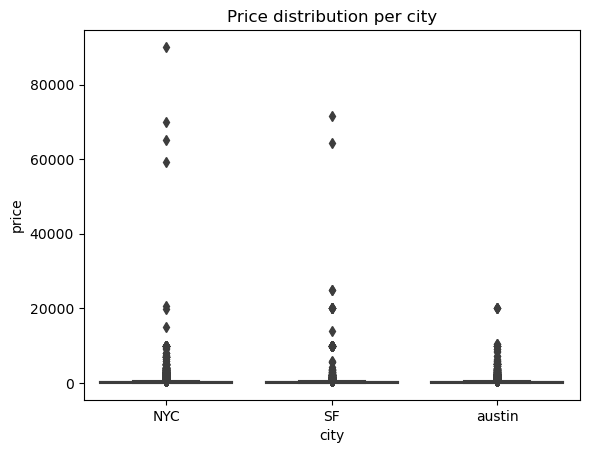

In [7]:
#Let's check the distributions
sns.boxplot(data=listings, x='city', y='price')
plt.title("Price distribution per city")
plt.show()

We can't see much with the outliers. We repeat the visual without the outliers

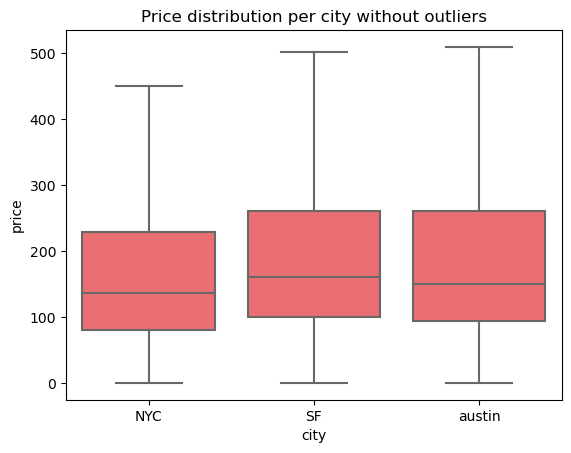

In [8]:
#Let's check the distributions
sns.boxplot(data=listings, x='city', y='price', showfliers=False, color=airbnb_color1)
plt.title("Price distribution per city without outliers")
plt.show()

Counter-intuitively, the data is showing us that the IQR of austin is at a higher point than that of NYC. We need to investigate that by the same type of room (maybe Austin has a higher offer of entire homes)

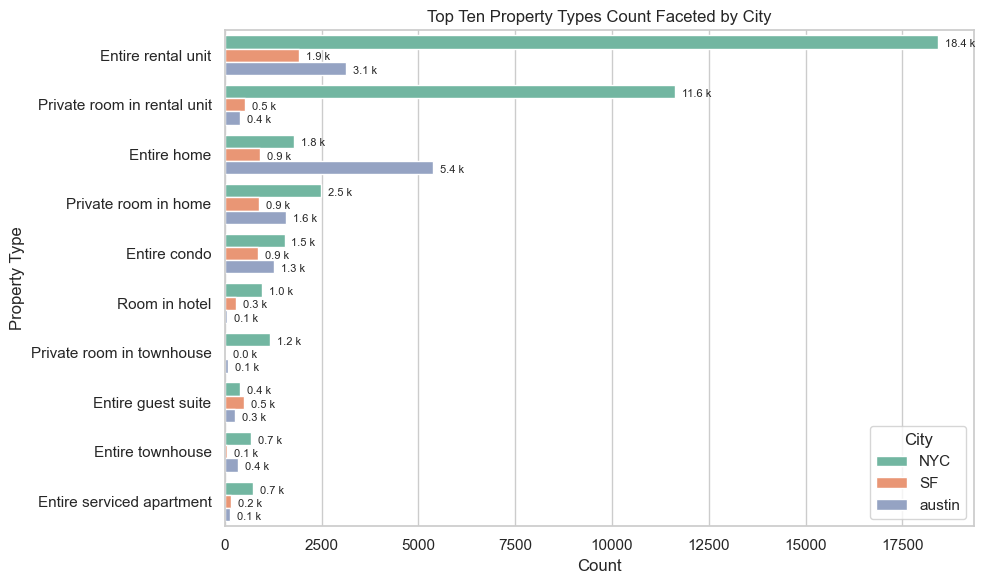

In [9]:
# Calculate the total count of each property type across all cities
property_type_counts = listings['property_type'].value_counts()

# Get the top ten property types based on total count
top_property_types = property_type_counts.head(10).index.tolist()

# Filter the DataFrame to include only the top property types
filtered_listings = listings[listings['property_type'].isin(top_property_types)]

# Set the order of property types based on their total count
property_type_order = property_type_counts.loc[top_property_types].index

# Set the style for the plot
sns.set(style="whitegrid")

# Create a vertical countplot faceted by 'city' using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=filtered_listings, y='property_type', hue='city', palette='Set2', order=property_type_order)

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(f'{str(round(p.get_width()/1000,1)) + " k"}', (p.get_x() + p.get_width(), p.get_y()+.24),\
                xytext=(5, 0), textcoords='offset points',fontsize=8)


# Add labels and title
plt.xlabel('Count')
plt.ylabel('Property Type')
plt.title('Top Ten Property Types Count Faceted by City')

# Display the plot
plt.legend(title='City')
plt.tight_layout()
plt.show()



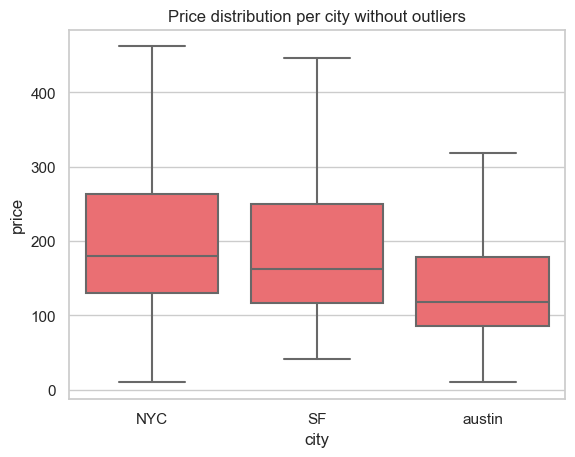

In [11]:
#List of revelant types
['Entire rental unit', 'Private room in rental unit', 'Entire home', 'Private room in home', 'Entire condo']

#Let's check the distributions for entire rental units
sns.boxplot(data=listings[listings['property_type']=='Entire rental unit'], x='city', y='price', showfliers=False, color=airbnb_color1)
plt.title("Price distribution per city without outliers")
plt.show()

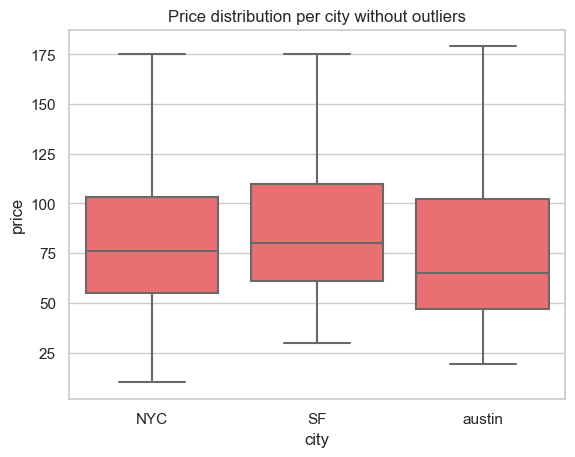

In [12]:
#Let's check the distributions for private room in rental unit
sns.boxplot(data=listings[listings['property_type']=='Private room in rental unit'], x='city', y='price', showfliers=False, color=airbnb_color1)
plt.title("Price distribution per city without outliers")
plt.show()

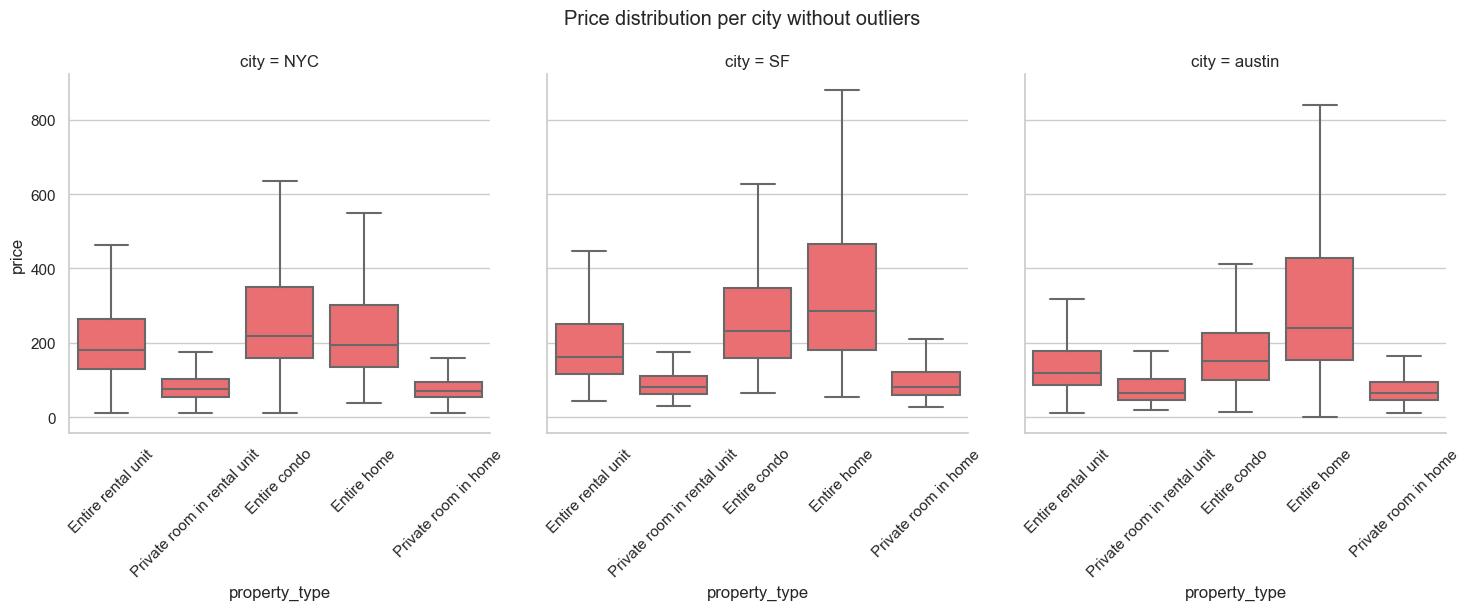

In [13]:


relevant_house_types = ['Entire rental unit', 'Private room in rental unit', 'Entire home', 'Private room in home', 'Entire condo']

filtered_listings = listings[listings['property_type'].isin(relevant_house_types)]

# Create a boxplot faceted by city
plot = sns.catplot(data=filtered_listings, x='property_type', y='price', col='city', kind='box', showfliers=False, color=airbnb_color1)
plt.subplots_adjust(top=0.85)  # Adjust the plot title position
plt.suptitle("Price distribution per city without outliers")

# Rotate x-axis labels by 45 degrees
for ax in plot.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    
plt.show()



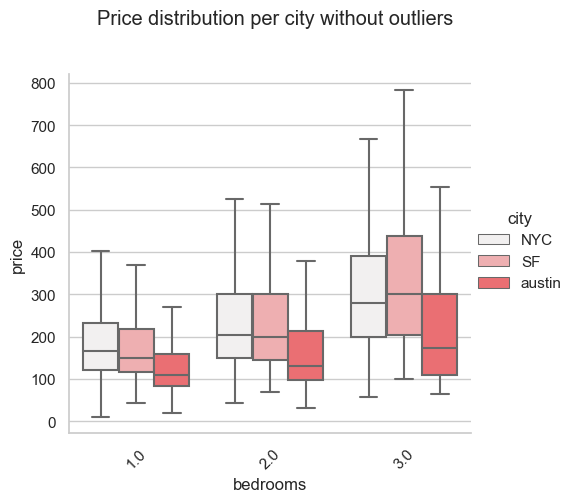

In [14]:
relevant_house_types = ['Entire rental unit']

filtered_listings = listings[(listings['property_type'].isin(relevant_house_types)) &
                             (listings['bedrooms'] < 4)]

# Create a boxplot faceted by city
plot = sns.catplot(data=filtered_listings, x='bedrooms', y='price', hue='city', kind='box', showfliers=False, color=airbnb_color1)
plt.subplots_adjust(top=0.85)  # Adjust the plot title position
plt.suptitle("Price distribution per city without outliers")

# Rotate x-axis labels by 45 degrees
for ax in plot.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    
plt.show()



In [15]:
#Importing and cleaning up the rent dataset from https://www.zumper.com/blog/rental-price-data/

#Import csv file
rent_median_prices = pd.read_csv("data/rent_median_prices.csv", index_col='Ranking')

#Correct number types for price of 1 bedroom
rent_median_prices['Price 1 bedroom'] = rent_median_prices['Price 1 bedroom'].str.replace("$","")
rent_median_prices['Price 1 bedroom'] = rent_median_prices['Price 1 bedroom'].str.replace(",","")
rent_median_prices['Price 1 bedroom'] = rent_median_prices['Price 1 bedroom'].astype('float')

#Correct number types for price of 2 bedroom
rent_median_prices['Price 2 bedroom'] = rent_median_prices['Price 2 bedroom'].str.replace("$","")
rent_median_prices['Price 2 bedroom'] = rent_median_prices['Price 2 bedroom'].str.replace(",","")
rent_median_prices['Price 2 bedroom'] = rent_median_prices['Price 2 bedroom'].astype('float')

len(rent_median_prices)

C:\Users\Bernardo Carvalho\AppData\Local\Temp\ipykernel_24984\2869344533.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_median_prices['Price 1 bedroom'] = rent_median_prices['Price 1 bedroom'].str.replace("$","")
C:\Users\Bernardo Carvalho\AppData\Local\Temp\ipykernel_24984\2869344533.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_median_prices['Price 2 bedroom'] = rent_median_prices['Price 2 bedroom'].str.replace("$","")


100

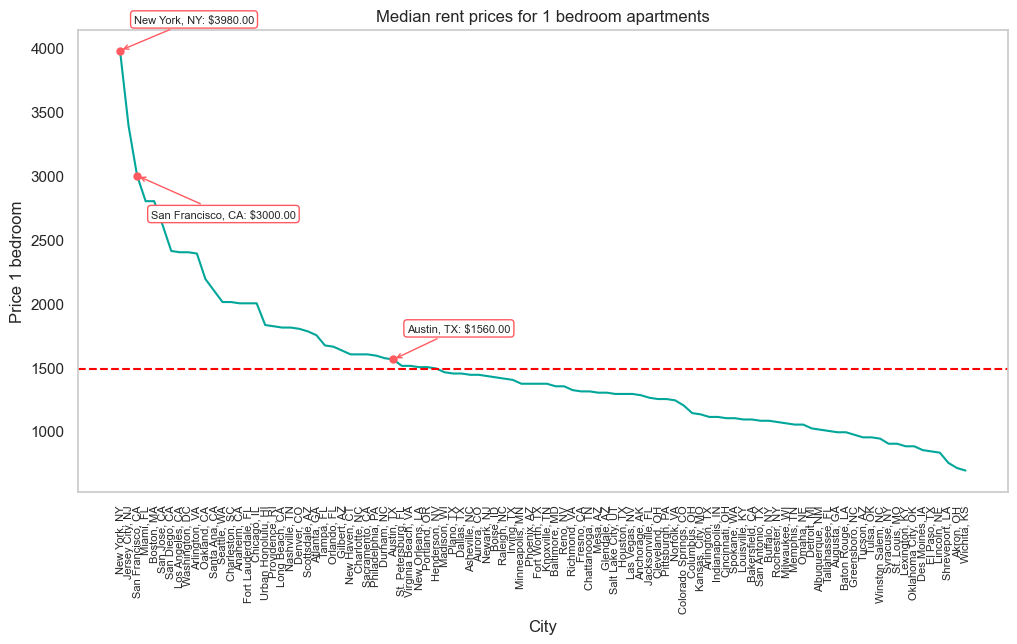

In [16]:
plt.figure(figsize=(12, 6))
sns.lineplot(rent_median_prices, x='City', y='Price 1 bedroom', color=airbnb_color2)

average_price = rent_median_prices['Price 1 bedroom'].mean()

plt.title('Median rent prices for 1 bedroom apartments')
plt.axhline(y=average_price, color='red', linestyle='--', label='Average Price')

# Annotate the average price for Austin, TX with a marker and border
austin_price = rent_median_prices[rent_median_prices['City'] == 'Austin, TX']['Price 1 bedroom'].values[0]
plt.annotate(f'Austin, TX: ${austin_price:.2f}', xy=('Austin, TX', austin_price),
             xytext=(10, 20), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color=airbnb_color1, lw=1),
             fontsize=8, bbox=dict(boxstyle='round,pad=0.3', edgecolor=airbnb_color1, facecolor='white'))

# Annotate the average price for New York, NY with a marker and border
ny_price = rent_median_prices[rent_median_prices['City'] == 'New York, NY']['Price 1 bedroom'].values[0]
plt.annotate(f'New York, NY: ${ny_price:.2f}', xy=('New York, NY', ny_price),
             xytext=(10, 20), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color=airbnb_color1, lw=1),
             fontsize=8, bbox=dict(boxstyle='round,pad=0.3', edgecolor=airbnb_color1, facecolor='white'))

# Annotate the average price for San Francisco, CA with a marker and border
sf_price = rent_median_prices[rent_median_prices['City'] == 'San Francisco, CA']['Price 1 bedroom'].values[0]
plt.annotate(f'San Francisco, CA: ${sf_price:.2f}', xy=('San Francisco, CA', sf_price),
             xytext=(10, -30), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color=airbnb_color1, lw=1),
             fontsize=8, bbox=dict(boxstyle='round,pad=0.3', edgecolor=airbnb_color1, facecolor='white'))

# Add markers to the line for the three cities
plt.plot('Austin, TX', austin_price, marker='o', markersize=5, color=airbnb_color1)
plt.plot('New York, NY', ny_price, marker='o', markersize=5, color=airbnb_color1)
plt.plot('San Francisco, CA', sf_price, marker='o', markersize=5, color=airbnb_color1)

plt.xticks(rotation=90, fontsize=8)

# Remove the grid
plt.grid(False)



plt.show()

In [17]:
turnover = [3980*12,3000*12,1560*12]
city = ['NYC', 'SF', 'Austin']

In [18]:
ny_median = listings[(listings['city'] == 'NYC') & (listings['bedrooms'] == 1)]['price'].median()

sf_median = listings[(listings['city'] == 'SF') & (listings['bedrooms'] == 1)]['price'].median()

austin_median = listings[(listings['city'] == 'austin') & (listings['bedrooms'] == 1)]['price'].median()

print("{}, {}, {}".format(ny_median, sf_median, austin_median))


160.0, 154.0, 117.0


In [19]:
rent_austin = rent_median_prices[rent_median_prices['City'] == 'Austin, TX']['Price 1 bedroom'].values[0]

rent_sf = rent_median_prices[rent_median_prices['City'] == 'San Francisco, CA']['Price 1 bedroom'].values[0]

rent_ny = rent_median_prices[rent_median_prices['City'] == 'New York, NY']['Price 1 bedroom'].values[0]

print("{}, {}, {}".format(rent_ny, rent_sf, rent_austin))

3980.0, 3000.0, 1560.0


In [20]:
rent_austin

1560.0

In [21]:
def calculate_price(row):
    if row['city'] == 'austin':
        return row['price'] / rent_austin
    elif row['city'] == 'NYC':
        return row['price'] / rent_ny
    else:
        return row['price'] / rent_sf

listings['price_night/median_rent'] = listings.apply(calculate_price, axis=1)


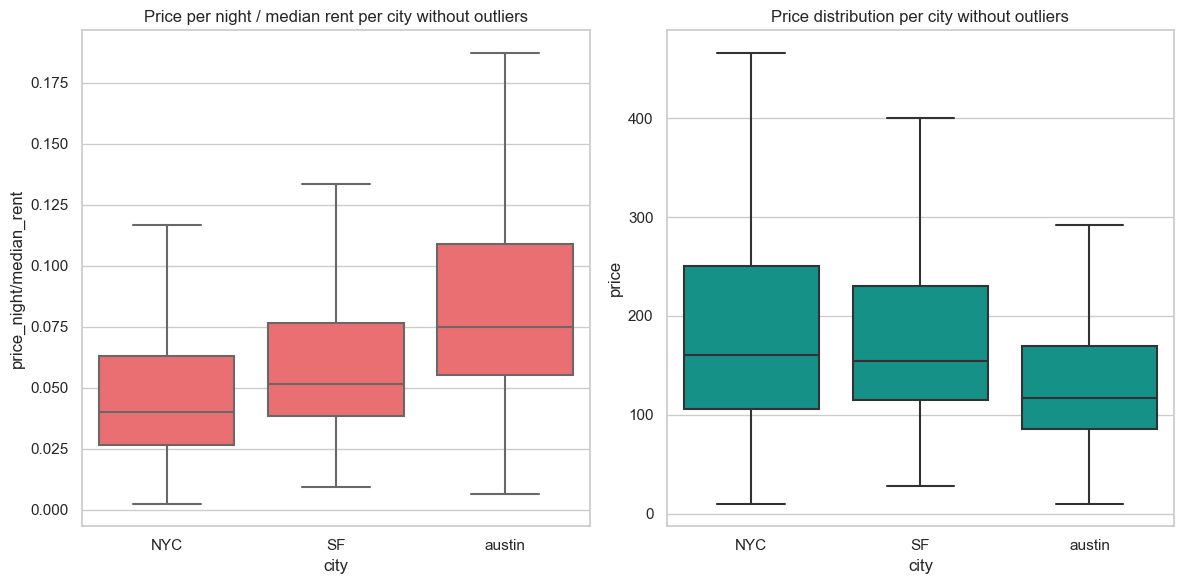

In [22]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 6))  # Create subplots with two columns

# Let's check the distributions for private room in rental unit
listings_filtered = listings[listings['bedrooms'] == 1]

sns.boxplot(data=listings_filtered, x='city', y='price_night/median_rent', showfliers=False, color=airbnb_color1, ax=ax0)
ax0.set_title("Price per night / median rent per city without outliers")

sns.boxplot(data=listings_filtered, x='city', y='price', showfliers=False, color=airbnb_color2, ax=ax1)
ax1.set_title("Price distribution per city without outliers")

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

How does this relate to Airbnb data?
In order to know this, we need to answer to fundamental question: Is buying a home to turn it into an Airbnb overall profitable?
How much more profitable is it than other investments? Or in terms of diversifying and owning property?

To answer this, I need to answer how much money does an Airbnb make on average a year. Then, we look into this return on the focus cities.

The plot above shows that the Airbnb prices are above the median rent prices. Can we prove that when the prices inevitably go up, so will the Airbnb price? Or is this a proof that in comparison to rents, Airbnb's are more profitable in Austin than in Nyc or SF

In [23]:
print("The interval between the first day and last day is: {}".format(calendar['date'].max()-calendar['date'].min())) 

The interval between the first day and last day is: 370 days 00:00:00


There are 1763 listings with the full year taken

We need to only consider the listings that were always available (taken or not) for the span of the data

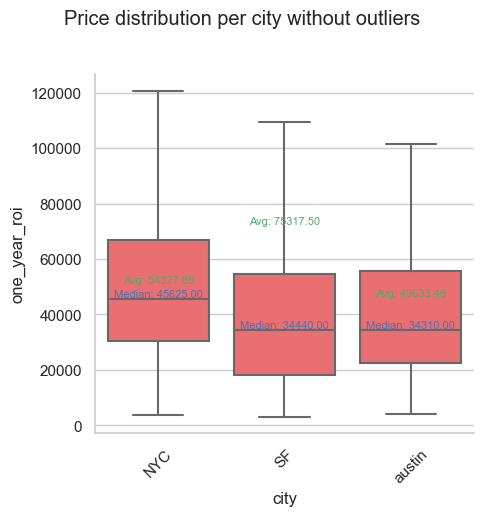

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your code for filtering the data remains the same
relevant_house_types = ['Entire rental unit']

filtered_listings = listings[(listings['property_type'].isin(relevant_house_types)) &
                             (listings['bedrooms'] == 1) &
                             (listings['availability_365'] < 300) &
                            (listings['price'] > 20)]

# Create a boxplot faceted by city
plot = sns.catplot(data=filtered_listings, x='city', y='one_year_roi', kind='box', showfliers=False, color=airbnb_color1)
plt.subplots_adjust(top=0.85)  # Adjust the plot title position
plt.suptitle("Price distribution per city without outliers")

# Rotate x-axis labels by 45 degrees
for ax in plot.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Calculate and annotate median and average for each city
for ax in plot.axes.flat:
    medians = filtered_listings.groupby('city')['one_year_roi'].median()
    averages = filtered_listings.groupby('city')['one_year_roi'].mean()
    for i, city in enumerate(ax.get_xticklabels()):
        ax.text(i, medians[i], f'Median: {medians[i]:.2f}', horizontalalignment='center', verticalalignment='bottom', fontsize=8, color='b')
        ax.text(i, averages[i], f'Avg: {averages[i]:.2f}', horizontalalignment='center', verticalalignment='top', fontsize=8, color='g')

plt.show()


In [89]:
filtered_listings = listings[(listings['property_type'].isin(relevant_house_types)) &
                             (listings['bedrooms'] == 1) &
                            (listings['price'] > 20)]

grouped_filtered_listings = filtered_listings.groupby(['city', 'availability_365']).agg({'one_year_roi':'median',
                                                                                         'one_year_roi':'mean'}).reset_index()
grouped_filtered_listings.sort_values('availability_365', inplace=True)
grouped_filtered_listings = grouped_filtered_listings.pivot(index='availability_365', columns='city', values='one_year_roi').reset_index()


grouped_filtered_listings['NYC_airbnb_roi'] = (grouped_filtered_listings['NYC'] - rent_ny*12)/rent_ny*12
grouped_filtered_listings['SF_airbnb_roi'] = (grouped_filtered_listings['SF'] - rent_sf*12)/rent_sf*12
grouped_filtered_listings['austin_airbnb_roi'] = (grouped_filtered_listings['austin'] - rent_austin*12)/rent_austin*12


Index(['availability_365', 'NYC', 'SF', 'austin', 'NYC_airbnb_roi',
       'SF_airbnb_roi', 'austin_airbnb_roi'],
      dtype='object', name='city')

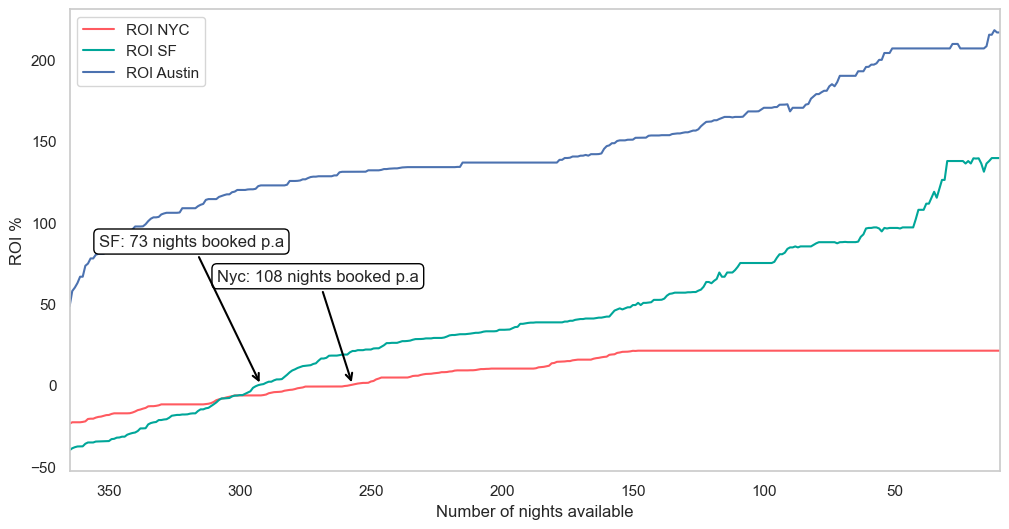

In [102]:
#This code created the line plot of the ROI per city for listings of value smaller then x
airbnb_roi_nyc = []
airbnb_roi_sf = []
airbnb_roi_austin = []

for i in range(10,366):
    filtered_listings = listings[(listings['property_type'].isin(relevant_house_types)) &
                             (listings['bedrooms'] == 1) &
                             (listings['availability_365'] < i) &
                            (listings['price'] > 20)]
    medians = filtered_listings.groupby('city')['one_year_roi'].median()
    averages = filtered_listings.groupby('city')['one_year_roi'].mean()
    airbnb_roi_nyc.append((medians[0] - rent_ny*12)/rent_ny*12)
    airbnb_roi_sf.append((medians[1] - rent_sf*12)/rent_sf*12)
    airbnb_roi_austin.append((medians[2] - rent_austin*12)/rent_austin*12)
    
plt.figure(figsize=(12, 6))

# Create the x-axis values as a range from 10 to 365
x = np.arange(10, 366)

# Create a line plot for each list
plt.plot(x, airbnb_roi_nyc, label='ROI NYC', color=airbnb_color1)
plt.plot(x, airbnb_roi_sf, label='ROI SF', color=airbnb_color2)
plt.plot(x, airbnb_roi_austin, label='ROI Austin')

# Add labels and a legend
plt.xlabel('Number of nights available')
plt.ylabel('ROI %')
plt.legend()
i=0

# Annotate the x-value at the intersection with y = 0 for each line
for line, label in zip([airbnb_roi_nyc, airbnb_roi_sf], ['Nyc', 'SF']):
    intersection_x = x[np.argwhere(np.diff(np.sign(line)))[0][0]]  # Find the intersection point
    i+=1
    # Create the annotation with a border and arrow
    plt.annotate(f'{label}: {365-intersection_x} nights booked p.a', 
                 (intersection_x, 0), 
                 textcoords="offset points", 
                 xytext=(0 - i*25, 50 + i*25), 
                 ha='center', 
                 bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'),
                 arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

# Reverse the x-axis
plt.xlim(max(x), min(x))

# Remove the grid
plt.grid(False)

# Show the plot
plt.show()

## Creating the geo map of Austin, with color coding for the median roi

Start by importing the necessary libraries and and the geoson file

In [27]:
import geopandas as gpd
# Replace 'your-geojson-file.geojson' with the actual path to your GeoJSON file
gdf = gpd.read_file('neighbourhoods.geojson')

# Access specific columns, e.g., 'geometry' or 'name'
geometries = gdf['geometry']
names = gdf['neighbourhood']

#Turn the neighbourhood code to int
gdf['neighbourhood'] = gdf['neighbourhood'].astype(int)

In [28]:
#Filter the listings for Austin
listings_austin = listings[listings['city']=='austin']

median_roi_by_neighbourhood = listings_austin.groupby('neighbourhood_cleansed').agg({'one_year_roi':'median', 
                                                                                     'price':'median',
                                                                                     'id':'count'}).reset_index()

median_roi_by_neighbourhood.columns = ['neighbourhood_cleansed', 'median_one_year_roi', 'median_price', 'n_listings']

median_roi_by_neighbourhood['neighbourhood_cleansed'] = median_roi_by_neighbourhood['neighbourhood_cleansed'].astype(int)

#Filtering out neighbourhoods with less than 20 listings
median_roi_by_neighbourhood = median_roi_by_neighbourhood[median_roi_by_neighbourhood['n_listings']>20]

#Merging the geojson neighborhood data with the aggregated one_year_roi
merged_gdf = gdf.merge(median_roi_by_neighbourhood, left_on='neighbourhood', right_on='neighbourhood_cleansed', how='left')

#Drop na neighborhoods
merged_gdf.dropna(subset=['n_listings'], inplace=True)

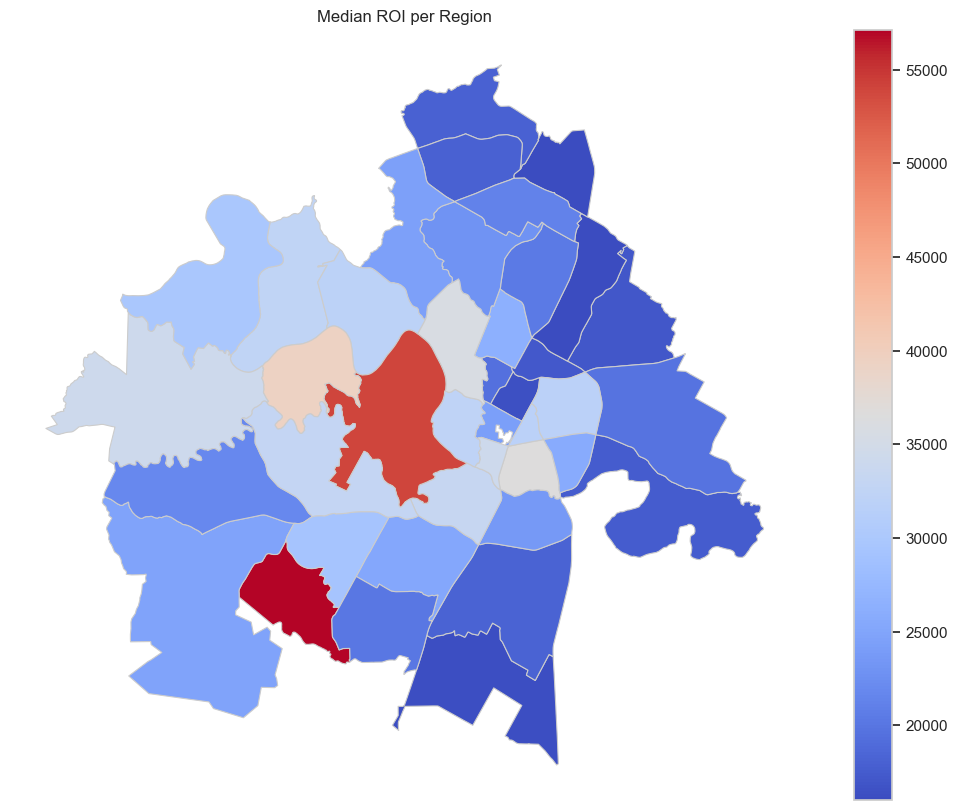

In [29]:
# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(14, 10))

# Plot the GeoDataFrame with color coding based on the average ROI
merged_gdf.plot(column='median_one_year_roi', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Set the plot title and labels
plt.title('Median ROI per Region')

# Remove the grid
plt.grid(False)

# Remove the x and y axes
plt.axis('off')

# Display the plot
plt.show()

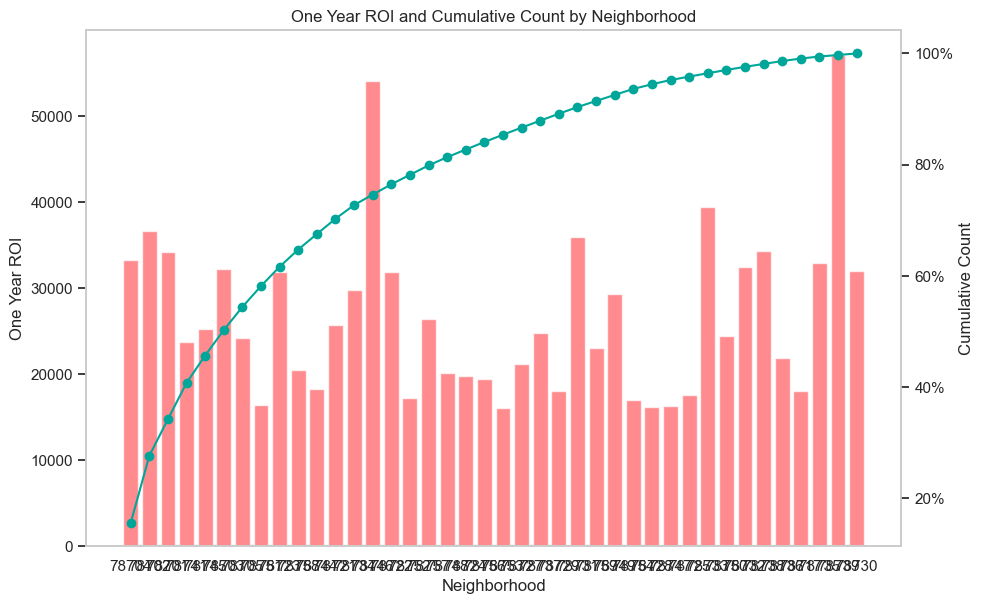

In [48]:
from matplotlib.ticker import FuncFormatter

# Sort the data by "one_year_roi" in ascending order
median_roi_by_neighbourhood = median_roi_by_neighbourhood.sort_values(by="n_listings", ascending=False)

# Calculate the cumulative sum of the "count" column for the line chart
median_roi_by_neighbourhood['cumulative_count'] = median_roi_by_neighbourhood['n_listings'].cumsum()/median_roi_by_neighbourhood['n_listings'].sum()

# Create a figure and axes for the plots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Create the bar chart for "one_year_roi"
bars = ax1.bar(range(len(median_roi_by_neighbourhood)), median_roi_by_neighbourhood['median_one_year_roi'], color=airbnb_color1, alpha=0.7)
ax1.set_xlabel('Neighborhood')
ax1.set_ylabel('One Year ROI')

# Create a secondary y-axis for the line chart
ax2 = ax1.twinx()
line, = ax2.plot(range(len(median_roi_by_neighbourhood)), median_roi_by_neighbourhood['cumulative_count'], color=airbnb_color2, marker='o')
ax2.set_ylabel('Cumulative Count')

# Set y-axis formatter for the secondary axis to display as a percentage
def percentage_formatter(x, pos):
    return f'{x:.0%}'

ax2.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))


# Set x-axis ticks and labels
x_ticks = range(len(median_roi_by_neighbourhood))
x_labels = median_roi_by_neighbourhood['neighbourhood_cleansed']
plt.xticks(x_ticks, x_labels, rotation=90, ha='center', fontsize=8)  # Use 'ha' parameter to align the labels to the right


plt.tight_layout()

# Remove the grids
ax1.grid(False)
ax2.grid(False)

# Show the combined plot
plt.title('One Year ROI and Cumulative Count by Neighborhood')
plt.show()

In [1]:
# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(14, 10))

# Plot the GeoDataFrame with color coding based on the average ROI
merged_gdf.plot(column='median_price', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Set the plot title and labels
plt.title('Median price per night per neighborhood')

# Remove the grid
plt.grid(False)

# Remove the x and y axes
plt.axis('off')

# Display the plot
plt.show()

NameError: name 'plt' is not defined